# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr

## Read in Data
flight = pd.read_csv("flight.csv")

## Task 1
print('The max and min cost of a coach ticket is $' + str(round(flight.coach_price.max(),2)) +' and $'\
      + str(round(flight.coach_price.min(),2)) + ' respectively.')
print('The average cost of a coach ticket is $' + str(round(flight.coach_price.mean(),2))+ '.')
print('$500 is above the 75th percentile and thus is considered expensive.')
flight.coach_price.describe()

The max and min cost of a coach ticket is $593.63 and $44.41 respectively.
The average cost of a coach ticket is $376.59.
$500 is above the 75th percentile and thus is considered expensive.


count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

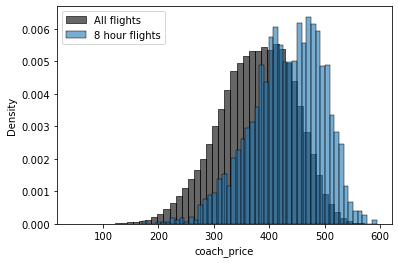

In [43]:
## Task 2
flight_8hours = flight[flight.hours == 8]
# Price is slightly more reasonable than before. From the histogram plot, the distribution
# for the 8 hours flights shifted to the right instead indicating higher prices. 

sns.histplot(x='coach_price', data=flight, stat="density", common_norm=False, bins=50, color='black', alpha=0.6)
sns.histplot(x='coach_price', data=flight_8hours, stat="density", common_norm=False, bins=50, alpha=0.6)
plt.legend(['All flights', '8 hour flights'])
plt.show()

In [44]:
flight_8hours.coach_price.describe()

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

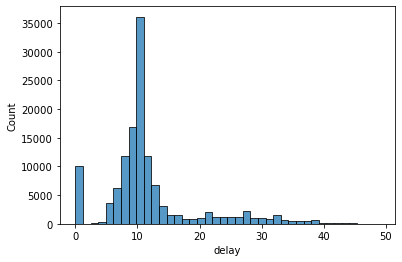

In [62]:
## Task 3
flight.delay.value_counts()
sns.histplot(flight.delay[flight.delay < 50], bins=40)
plt.show()

# Necessary to limit data as there are some anomalies, e.g. the maximum delay is 1560 hours
# which translates to 65 days. 
# Delays of 10 hours are most typical. 

In [63]:
flight.delay.describe()

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

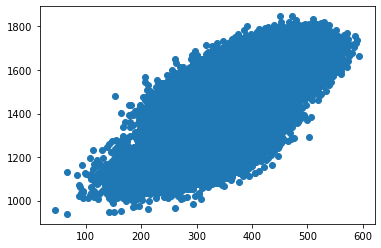

The correlation coefficient is 0.759.


In [75]:
## Task 4
plt.scatter(x=flight.coach_price, y=flight.firstclass_price)
plt.show()

corr_price, p = pearsonr(flight.coach_price, flight.firstclass_price)
print('The correlation coefficient is ' + str(round(corr_price,3)) + '.')
# Since correlation coefficient > 0.6, this suggests a strong linear assocation between
# coach prices and first-class prices. 

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [111]:
# Inflight meal shows the least increase in mean coach price.
# Inflight entertainment v.s. inflight wifi:
entertainment_mean_diff = flight.coach_price[flight.inflight_entertainment == 'Yes'].mean() - \
                          flight.coach_price[flight.inflight_entertainment == 'No'].mean()
print(entertainment_mean_diff)

wifi_mean_diff = flight.coach_price[flight.inflight_wifi == 'Yes'].mean() - \
                          flight.coach_price[flight.inflight_wifi == 'No'].mean()
print(wifi_mean_diff)
# Difference in means are similar. Hence, both inflight entertainment and inflight wifi are associated with
# the highest increase in price. 

70.06515472357268
70.46574876513739


6. How does the number of passengers change in relation to the length of flights?

In [149]:
# Since there is too much data, we will take a percentage of it.
perc = 0.05
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

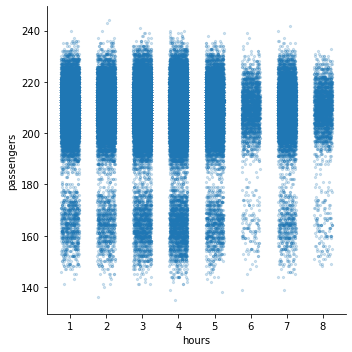

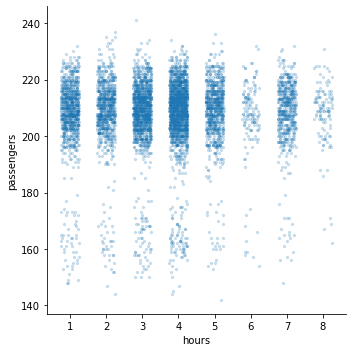

In [157]:
## Task 6
# Original data
sns.lmplot(x='hours', y='passengers', data=flight, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg=False)
plt.show()

# Data subset
sns.lmplot(x='hours', y='passengers', data=flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg=False)
plt.show()

# Lesser passengers for longer flights except for 4 hour flights where there
# are the most number of passengers. 


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

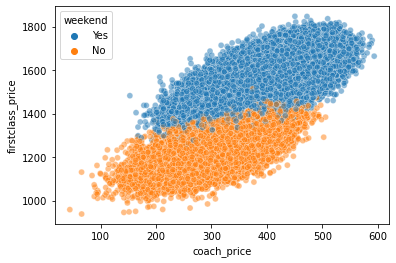

In [161]:
## Task 7
sns.scatterplot(x='coach_price', y='firstclass_price', hue='weekend', data=flight, alpha=0.5)
plt.show()

In [158]:
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

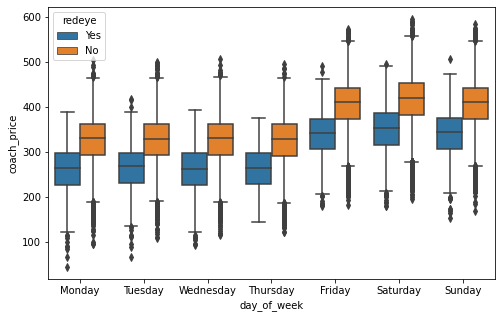

In [167]:
## Task 8
order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 5))
sns.boxplot(x='day_of_week', y='coach_price', hue='redeye', data=flight, order=order)
plt.show()
# Red eye flights are cheaper in general as compared to non red-eye flights.
# Flights are more expensive on Friday, Saturday and Sunday. 